In [1]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.svm import SVC

In [2]:
#Load data.mat file
mat = scipy.io.loadmat('exampleCV_atMatlab/data.mat')

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data'])

In [4]:
data = mat['data'][0][0]

#features and labels of data
type(data[0]), data[0].shape, type(data[1]), data[1].shape

(numpy.ndarray, (84, 1190), numpy.ndarray, (84, 1))

In [5]:
mtype = data.dtype 
ndata = {n: data[n] for n in mtype.names}
dataFeatures = data['features']
dataLabels = data['labels']

In [6]:
dataFeatures.shape, dataLabels.shape

print("Shape of Data Features: {0}\nShape of Data Labels: {1}".format(dataFeatures.shape,dataLabels.shape))

Shape of Data Features: (84, 1190)
Shape of Data Labels: (84, 1)


In [7]:
dataFeatures

array([[0.0530716 , 0.0772467 , 0.        , ..., 0.262905  , 0.00870984,
        0.271614  ],
       [0.0356869 , 0.0762979 , 0.        , ..., 0.345782  , 0.0253565 ,
        0.371138  ],
       [0.0529476 , 0.0567482 , 0.        , ..., 0.150802  , 0.0311162 ,
        0.181918  ],
       ...,
       [0.00564811, 0.0895224 , 0.        , ..., 0.264739  , 0.0034535 ,
        0.268192  ],
       [0.0485545 , 0.120048  , 0.        , ..., 0.228666  , 0.0176481 ,
        0.246314  ],
       [0.0039096 , 0.0453717 , 0.        , ..., 0.26317   , 0.0118474 ,
        0.275017  ]])

In [8]:
dataLabels

array([[ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],

In [9]:
#Split shuffle
kf = KFold(n_splits=5,shuffle=True)
kf.get_n_splits(dataFeatures)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=True)


In [10]:
#DecisionTreeClassifier
accuracy_model = []
clf = tree.DecisionTreeClassifier(random_state=20) 
# Iterate over each train-test split
for train_index, test_index in kf.split(dataFeatures):
    # Split train-test
    X_train, X_test = dataFeatures[train_index], dataFeatures[test_index]
    y_train, y_test = dataLabels[train_index], dataLabels[test_index]
    # Train the model
    model = clf.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
    
# Print the accuracy    
print(accuracy_model)

[64.70588235294117, 64.70588235294117, 47.05882352941176, 88.23529411764706, 56.25]


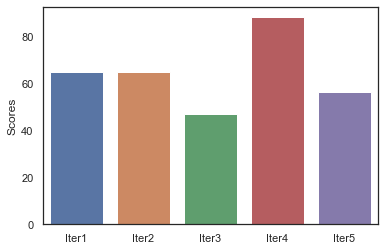

In [11]:
scores = pd.DataFrame(accuracy_model,columns=['Scores'])
 
sns.set(style="white", rc={"lines.linewidth": 3})
sns.barplot(x=['Iter1','Iter2','Iter3','Iter4','Iter5'],y="Scores",data=scores)
plt.show()
sns.set()

In [12]:
#Shuffle = False
kf = KFold(n_splits=5,shuffle=False)
kf.get_n_splits(dataFeatures)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [13]:
#DecisionTreeClassifier
accuracy_model = []
clf = tree.DecisionTreeClassifier(random_state=20) 
# Iterate over each train-test split
for train_index, test_index in kf.split(dataFeatures):
    # Split train-test
    X_train, X_test = dataFeatures[train_index], dataFeatures[test_index]
    y_train, y_test = dataLabels[train_index], dataLabels[test_index]
    # Train the model
    model = clf.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
    
print(accuracy_model)

[47.05882352941176, 58.82352941176471, 58.82352941176471, 52.94117647058824, 50.0]


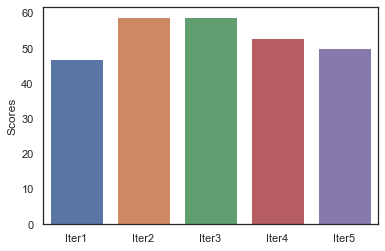

In [14]:
scores = pd.DataFrame(accuracy_model,columns=['Scores'])
 
sns.set(style="white", rc={"lines.linewidth": 3})
sns.barplot(x=['Iter1','Iter2','Iter3','Iter4','Iter5'],y="Scores",data=scores)
plt.show()
sns.set()

In [15]:
#Shuffle = False
kf = KFold(n_splits=5,shuffle=False)
kf.get_n_splits(dataFeatures)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [16]:
#svc classifiear
accuracy_model = []

svclassifier = SVC(kernel='linear')

# Iterate over each train-test split
for train_index, test_index in kf.split(dataFeatures):
    # Split train-test
    X_train, X_test = dataFeatures[train_index], dataFeatures[test_index]
    y_train, y_test = dataLabels[train_index], dataLabels[test_index]
    # Train the model
    svclassifier.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, svclassifier.predict(X_test), normalize=True)*100)
 
# Print the accuracy    
print(accuracy_model)

[58.82352941176471, 52.94117647058824, 64.70588235294117, 58.82352941176471, 68.75]


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

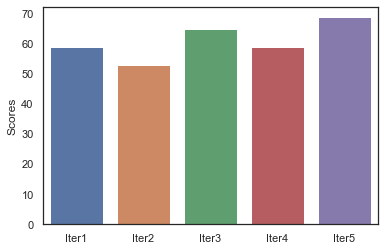

In [17]:
scores = pd.DataFrame(accuracy_model,columns=['Scores'])
 
sns.set(style="white", rc={"lines.linewidth": 3})
sns.barplot(x=['Iter1','Iter2','Iter3','Iter4','Iter5'],y="Scores",data=scores)
plt.show()
sns.set()

In [18]:
#Shuffle = True
kf = KFold(n_splits=5,shuffle=True)
kf.get_n_splits(dataFeatures)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=True)


In [19]:
#svc classifiear
accuracy_model = []

svclassifier = SVC(kernel='linear')

# Iterate over each train-test split
for train_index, test_index in kf.split(dataFeatures):
    # Split train-test
    X_train, X_test = dataFeatures[train_index], dataFeatures[test_index]
    y_train, y_test = dataLabels[train_index], dataLabels[test_index]
    # Train the model
    svclassifier.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, svclassifier.predict(X_test), normalize=True)*100)
 
# Print the accuracy    
print(accuracy_model)

[64.70588235294117, 58.82352941176471, 82.35294117647058, 70.58823529411765, 56.25]


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

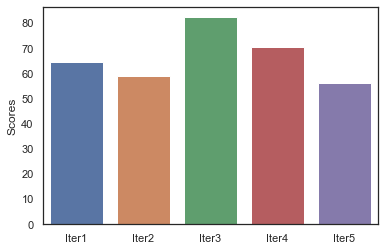

In [20]:
scores = pd.DataFrame(accuracy_model,columns=['Scores'])
 
sns.set(style="white", rc={"lines.linewidth": 3})
sns.barplot(x=['Iter1','Iter2','Iter3','Iter4','Iter5'],y="Scores",data=scores)
plt.show()
sns.set()

In [21]:
#Shuffle = False and 10 fold
kf = KFold(n_splits=10,shuffle=False)
kf.get_n_splits(dataFeatures)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [22]:
#svc classifiear
accuracy_model = []

svclassifier = SVC(kernel='linear')

# Iterate over each train-test split
for train_index, test_index in kf.split(dataFeatures):
    # Split train-test
    X_train, X_test = dataFeatures[train_index], dataFeatures[test_index]
    y_train, y_test = dataLabels[train_index], dataLabels[test_index]
    # Train the model
    svclassifier.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, svclassifier.predict(X_test), normalize=True)*100)
 
# Print the accuracy    
print(accuracy_model)

[55.55555555555556, 77.77777777777779, 55.55555555555556, 77.77777777777779, 37.5, 50.0, 62.5, 87.5, 87.5, 75.0]


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

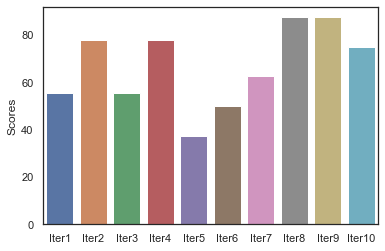

In [23]:
scores = pd.DataFrame(accuracy_model,columns=['Scores'])
 
sns.set(style="white", rc={"lines.linewidth": 3})
sns.barplot(x=['Iter1','Iter2','Iter3','Iter4','Iter5','Iter6','Iter7','Iter8','Iter9','Iter10'],y="Scores",data=scores)
plt.show()
sns.set()